In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.kernels import RBF, PolynomialKernel
from prml.kernel_methods import SupportVectorClassfier

# 7.1 Maximum Margin Classifiers

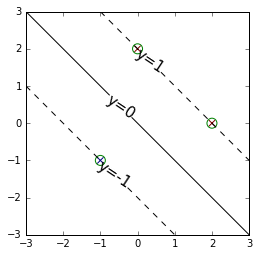

In [2]:
x_train = np.array([
        [0., 2.],
        [2., 0.],
        [-1., -1.]])
y_train = np.array([1., 1., -1.])

model = SupportVectorClassfier(PolynomialKernel(degree=1))
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")

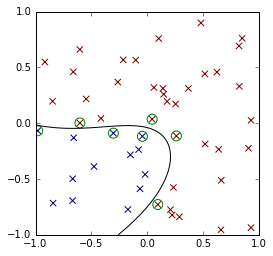

In [3]:
def create_toy_data():
    x = np.random.uniform(-1, 1, 100).reshape(-1, 2)
    y = x < 0
    y = (y[:, 0] * y[:, 1]).astype(np.float)
    return x, 1 - 2 * y

x_train, y_train = create_toy_data()

model = SupportVectorClassfier(RBF(np.ones(3)))
model.fit(x_train, y_train)

x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.zeros(1), colors="k")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect("equal", adjustable="box")

## 7.1.1 Overlapping class distributions

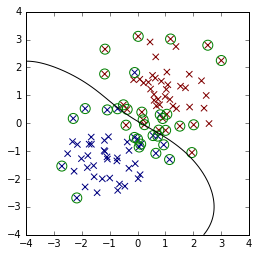

In [4]:
def create_toy_data():
    x0 = np.random.normal(size=100).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=100).reshape(-1, 2) + 1.
    x = np.concatenate([x0, x1])
    y = np.concatenate([-np.ones(50), np.ones(50)]).astype(np.int)
    return x, y

x_train, y_train = create_toy_data()

model = SupportVectorClassfier(RBF(np.array([1., 0.5, 0.5])), C=0.5)
model.fit(x_train, y_train, n_iter=int(1e5), learning_rate=0.01)

x0, x1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.zeros(1), colors="k")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect("equal", adjustable="box")